# 🏢 PROJETO FINAL: Análise Comparativa de Balanços Patrimoniais

## 📊 Objetivo
Realizar análise completa de balanços de 10 empresas do setor tecnológico, aplicando todas as técnicas aprendidas em Pandas.

## 🎯 Entregas
1. ✅ Dataset limpo e validado
2. ✅ 20+ features criadas (feature engineering)
3. ✅ Análises por setor, porte e região
4. ✅ 6 visualizações profissionais
5. ✅ Relatório executivo com insights
6. ✅ Documentação completa

## 🛠️ Tecnologias
- **Python 3.13**
- **Pandas** - Manipulação de dados
- **NumPy** - Cálculos numéricos
- **Matplotlib/Seaborn** - Visualizações
- **Módulo customizado** - `analise_financeira.py`

## 👨‍💻 Autor
Bruno Andrade

## 📅 Data
20/11/2025

---

In [1]:
# ==========================================
# CRIAR DATASET DE BALANÇOS
# ==========================================

import pandas as pd
import numpy as np

np.random.seed(42)

print("=" * 90)
print("GERANDO DATASET DE 10 EMPRESAS")
print("=" * 90)

# Dados de 10 empresas
empresas = ['TechCorp', 'DataPro', 'CloudNet', 'AlphaTech', 'BetaSoft',
            'GammaTech', 'DeltaData', 'EpsilonCloud', 'ZetaSoft', 'EtaTech']

dados_empresas = []

for empresa in empresas:
    # Dados aleatórios mas realistas
    base_receita = np.random.randint(1000, 3000)
    
    dados = {
        'empresa': empresa,
        'setor': np.random.choice(['Software', 'Dados', 'Cloud']),
        'regiao': np.random.choice(['Sul', 'Sudeste', 'Norte', 'Nordeste']),
        'fundacao': np.random.randint(2015, 2022),
        'funcionarios': np.random.randint(30, 100),
        
        # Balanço Patrimonial
        'ativo_circulante': base_receita * np.random.uniform(0.4, 0.6),
        'ativo_nao_circulante': base_receita * np.random.uniform(0.3, 0.5),
        'passivo_circulante': base_receita * np.random.uniform(0.2, 0.4),
        'passivo_nao_circulante': base_receita * np.random.uniform(0.1, 0.3),
        
        # DRE
        'receita_bruta': base_receita,
        'impostos': base_receita * 0.15,
        'cmv': base_receita * np.random.uniform(0.45, 0.55),
        'despesas_operacionais': base_receita * np.random.uniform(0.15, 0.25)
    }
    
    dados_empresas.append(dados)

df = pd.DataFrame(dados_empresas)

# Adicionar alguns NaN propositalmente (simular dados reais)
df.loc[2, 'funcionarios'] = np.nan
df.loc[5, 'ativo_circulante'] = np.nan
df.loc[7, 'despesas_operacionais'] = np.nan

# Adicionar duplicata
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)

print(f"\n✅ Dataset criado: {len(df)} linhas × {len(df.columns)} colunas")
print("\nPrimeiras 5 empresas:")
print(df.head())

# Salvar CSV
df.to_csv('dados/balanco_empresas.csv', index=False, encoding='utf-8')

print(f"\n💾 CSV salvo em: dados/balanco_empresas.csv")
print("=" * 90)

GERANDO DATASET DE 10 EMPRESAS

✅ Dataset criado: 11 linhas × 13 colunas

Primeiras 5 empresas:
     empresa     setor   regiao  fundacao  funcionarios  ativo_circulante  \
0   TechCorp  Software    Norte      2017          90.0       1104.180687   
1    DataPro     Dados      Sul      2016          59.0        499.988639   
2   CloudNet     Cloud    Norte      2021           NaN       1057.716815   
3  AlphaTech  Software    Norte      2019          80.0       1215.251438   
4   BetaSoft  Software  Sudeste      2018          89.0       1005.421716   

   ativo_nao_circulante  passivo_circulante  passivo_nao_circulante  \
0            827.368087          467.709334              407.872629   
1            380.092443          267.449419              181.758747   
2           1278.436852          637.096229              305.225405   
3            884.356361          459.414333              653.894276   
4            945.314820          490.093281              667.736007   

   receita_bru

## 🧹 FASE 1: Limpeza de Dados

**Objetivo:** Garantir qualidade antes de analisar

**Checklist:**
- [ ] Identificar valores faltantes
- [ ] Remover duplicatas
- [ ] Validar tipos de dados
- [ ] Tratar outliers
- [ ] Confirmar integridade

---

In [2]:
# ==========================================
# IMPORTAR E INSPECIONAR
# ==========================================

import pandas as pd
import numpy as np
import sys
sys.path.append('..')  # Para importar módulo da pasta acima
import analise_financeira as af

# Importar CSV
df = pd.read_csv('dados/balanco_empresas.csv')

print("=" * 90)
print("INSPEÇÃO INICIAL DO DATASET")
print("=" * 90)

# SEMPRE FAZER ISSO primeiro!
print("\n1. .head() - Primeiras 5 linhas:")
print(df.head())

print("\n2. .info() - Resumo técnico:")
df.info()

print("\n3. .shape - Dimensões:")
print(f"   {df.shape[0]} linhas × {df.shape[1]} colunas")

print("\n4. Valores faltantes:")
print(df.isnull().sum())

print("\n5. Duplicatas:")
print(f"   {df.duplicated().sum()} duplicata(s) encontrada(s)")

print("\n6. Estatísticas:")
print(df.describe())

print("\n" + "="*90)

INSPEÇÃO INICIAL DO DATASET

1. .head() - Primeiras 5 linhas:
     empresa     setor   regiao  fundacao  funcionarios  ativo_circulante  \
0   TechCorp  Software    Norte      2017          90.0       1104.180687   
1    DataPro     Dados      Sul      2016          59.0        499.988639   
2   CloudNet     Cloud    Norte      2021           NaN       1057.716815   
3  AlphaTech  Software    Norte      2019          80.0       1215.251438   
4   BetaSoft  Software  Sudeste      2018          89.0       1005.421716   

   ativo_nao_circulante  passivo_circulante  passivo_nao_circulante  \
0            827.368087          467.709334              407.872629   
1            380.092443          267.449419              181.758747   
2           1278.436852          637.096229              305.225405   
3            884.356361          459.414333              653.894276   
4            945.314820          490.093281              667.736007   

   receita_bruta  impostos          cmv  despesa

In [3]:
# ==========================================
# LIMPEZA - SUA VEZ!
# ==========================================

print("=" * 90)
print("LIMPEZA DO DATASET")
print("=" * 90)

# Copiar para não alterar original
df_limpo = df.copy()

print(f"\n📊 Antes da limpeza: {len(df_limpo)} linhas")

# TAREFA 1: Remover duplicatas
# ESCREVA:
df_limpo = df_limpo.drop_duplicates()
print(f"Duplicatas removidas: {len(df) - len(df_limpo)}")

# TAREFA 2: Preencher funcionarios faltantes com mediana
# ESCREVA:
mediana_func = df_limpo['funcionarios'].median()
df_limpo['funcionarios'] = df_limpo['funcionarios'].fillna(mediana_func)

# TAREFA 3: Preencher valores financeiros com média da coluna
# ESCREVA:
for col in ['ativo_circulante', 'despesas_operacionais']:
     if df_limpo[col].isnull().sum() > 0:
        media = df_limpo[col].mean()
        df_limpo[col] = df_limpo[col].fillna(media)
        print(f"{col}: {df.isnull().sum()} NaN preenchidos com média")

# TAREFA 4: Resetar índice
# ESCREVA:

df_limpo = df_limpo.reset_index(drop=True)
# VALIDAÇÃO
print(f"\n✅ Depois: {len(df_limpo)} linhas")
print(f"\nValores faltantes:")
print(df_limpo.isnull().sum())
print(f"\nDuplicatas: {df_limpo.duplicated().sum()}")

print("\n" + "="*90)

LIMPEZA DO DATASET

📊 Antes da limpeza: 11 linhas
Duplicatas removidas: 1
ativo_circulante: empresa                   0
setor                     0
regiao                    0
fundacao                  0
funcionarios              1
ativo_circulante          1
ativo_nao_circulante      0
passivo_circulante        0
passivo_nao_circulante    0
receita_bruta             0
impostos                  0
cmv                       0
despesas_operacionais     1
dtype: int64 NaN preenchidos com média
despesas_operacionais: empresa                   0
setor                     0
regiao                    0
fundacao                  0
funcionarios              1
ativo_circulante          1
ativo_nao_circulante      0
passivo_circulante        0
passivo_nao_circulante    0
receita_bruta             0
impostos                  0
cmv                       0
despesas_operacionais     1
dtype: int64 NaN preenchidos com média

✅ Depois: 10 linhas

Valores faltantes:
empresa                   0
setor     

## 🔧 FASE 2: Feature Engineering

**Objetivo:** Criar indicadores financeiros para análise

**Features a criar:**
- Patrimon

io Líquido
- Ativo Total, Passivo Total
- Receita Líquida, Lucro Bruto, EBITDA
- Margens (Bruta, Operacional)
- Liquidez Corrente
- Endividamento
- ROE, ROA
- Idade da empresa
- Classificações

---

In [14]:
# ==========================================
# FEATURE ENGINEERING COMPLETO
# ==========================================

print("=" * 90)
print("CRIANDO TODAS AS FEATURES")
print("=" * 90)

# ==========================================
# GRUPO 1: BALANÇO PATRIMONIAL
# ==========================================

print("\n1️⃣ Calculando Balanço...")

# Ativo Total
df_limpo['ativo_total'] = df_limpo['ativo_circulante'] + df_limpo['ativo_nao_circulante']

# Passivo Total
df_limpo['passivo_total'] = df_limpo['passivo_circulante'] + df_limpo['passivo_nao_circulante']

# Patrimônio Líquido
df_limpo['patrimonio_liquido'] = df_limpo['ativo_total'] - df_limpo['passivo_total']

print("   ✅ Ativo Total, Passivo Total, PL criados")

# ==========================================
# GRUPO 2: DRE
# ==========================================

print("\n2️⃣ Calculando DRE...")

# Receita Líquida
df_limpo['receita_liquida'] = df_limpo['receita_bruta'] - df_limpo['impostos']

# Lucro Bruto
df_limpo['lucro_bruto'] = df_limpo['receita_liquida'] - df_limpo['cmv']

# EBITDA
df_limpo['ebitda'] = df_limpo['lucro_bruto'] - df_limpo['despesas_operacionais']

print("   ✅ Receita Líquida, Lucro Bruto, EBITDA criados")

# ==========================================
# GRUPO 3: INDICADORES (cálculo direto)
# ==========================================

print("\n3️⃣ Calculando Indicadores...")

# Margem Bruta (%)
df_limpo['margem_bruta'] = (df_limpo['lucro_bruto'] / df_limpo['receita_liquida']) * 100

# Margem EBITDA (%)
df_limpo['margem_ebitda'] = (df_limpo['ebitda'] / df_limpo['receita_liquida']) * 100

# Liquidez Corrente
df_limpo['liquidez'] = df_limpo['ativo_circulante'] / df_limpo['passivo_circulante']

# Endividamento (%)
df_limpo['endividamento'] = (df_limpo['passivo_total'] / df_limpo['ativo_total']) * 100

# ROE (%)
df_limpo['roe'] = (df_limpo['ebitda'] / df_limpo['patrimonio_liquido']) * 100

print("   ✅ Margem Bruta, Margem EBITDA, Liquidez, Endividamento, ROE criados")

# ==========================================
# GRUPO 4: TEMPORAL
# ==========================================

print("\n4️⃣ Calculando Features Temporais...")

# Idade da empresa
df_limpo['idade'] = 2025 - df_limpo['fundacao']

print("   ✅ Idade criada")

# ==========================================
# GRUPO 5: CATEGORIZAÇÕES
# ==========================================

print("\n5️⃣ Criando Classificações...")

# Porte (por funcionários)
df_limpo['porte'] = pd.cut(
    df_limpo['funcionarios'],
    bins=[0, 50, 75, 200],
    labels=['Pequena', 'Média', 'Grande']
)

# Classificação de Liquidez
def classificar_liquidez(liq):
    if liq >= 1.5:
        return "Saudável"
    elif liq >= 1.0:
        return "Adequada"
    else:
        return "Atenção"

df_limpo['classe_liquidez'] = df_limpo['liquidez'].apply(classificar_liquidez)

# Classificação de Margem
def classificar_margem(margem):
    if margem >= 40:
        return "Excelente"
    elif margem >= 30:
        return "Boa"
    elif margem >= 20:
        return "Moderada"
    else:
        return "Baixa"

df_limpo['classe_margem'] = df_limpo['margem_bruta'].apply(classificar_margem)

# Classificação de Endividamento
df_limpo['classe_endiv'] = df_limpo['endividamento'].apply(
    lambda x: "Baixo" if x < 40 else "Médio" if x < 60 else "Alto"
)

print("   ✅ Porte, Classe Liquidez, Classe Margem, Classe Endividamento criados")

# ==========================================
# RESUMO FINAL
# ==========================================

print("\n" + "="*90)
print("✅ TODAS AS FEATURES CRIADAS COM SUCESSO!")
print("="*90)

print(f"\nColunas originais: 13")
print(f"Colunas finais: {len(df_limpo.columns)}")
print(f"Features criadas: {len(df_limpo.columns) - 13}")

print("\n📋 Lista completa de colunas:")
for i, col in enumerate(df_limpo.columns, 1):
    print(f"  {i:2}. {col}")

print("\n📊 Primeiras 3 empresas com indicadores principais:")
print(df_limpo[['empresa', 'setor', 'receita_liquida', 'ebitda', 'margem_bruta', 
                'liquidez', 'endividamento', 'classe_margem']].head(3))

print("\n✅ Dataset pronto para análise!")
print("="*90)

CRIANDO TODAS AS FEATURES

1️⃣ Calculando Balanço...
   ✅ Ativo Total, Passivo Total, PL criados

2️⃣ Calculando DRE...
   ✅ Receita Líquida, Lucro Bruto, EBITDA criados

3️⃣ Calculando Indicadores...
   ✅ Margem Bruta, Margem EBITDA, Liquidez, Endividamento, ROE criados

4️⃣ Calculando Features Temporais...
   ✅ Idade criada

5️⃣ Criando Classificações...
   ✅ Porte, Classe Liquidez, Classe Margem, Classe Endividamento criados

✅ TODAS AS FEATURES CRIADAS COM SUCESSO!

Colunas originais: 13
Colunas finais: 29
Features criadas: 16

📋 Lista completa de colunas:
   1. empresa
   2. setor
   3. regiao
   4. fundacao
   5. funcionarios
   6. ativo_circulante
   7. ativo_nao_circulante
   8. passivo_circulante
   9. passivo_nao_circulante
  10. receita_bruta
  11. impostos
  12. cmv
  13. despesas_operacionais
  14. ativo_total
  15. passivo_total
  16. patrimonio_liquido
  17. receita_liquida
  18. lucro_bruto
  19. ebitda
  20. margem_bruta
  21. margem_ebitda
  22. endividamento
  23. id

In [6]:
# ==========================================
# CRIAR DATASET E SALVAR CSV
# ==========================================

import pandas as pd
import numpy as np
import os

np.random.seed(42)

print("=" * 90)
print("CRIANDO DATASET DE BALANCOS")
print("=" * 90)

# Verificar/criar pasta dados
if not os.path.exists('dados'):
    os.makedirs('dados')
    print("Pasta dados criada")

# Gerar dados de 10 empresas
empresas_nomes = ['TechCorp', 'DataPro', 'CloudNet', 'AlphaTech', 'BetaSoft',
                  'GammaTech', 'DeltaData', 'EpsilonCloud', 'ZetaSoft', 'EtaTech']

dados_empresas = []

for empresa in empresas_nomes:
    base_receita = np.random.randint(1000, 3000)
    
    dados = {
        'empresa': empresa,
        'setor': np.random.choice(['Software', 'Dados', 'Cloud']),
        'regiao': np.random.choice(['Sul', 'Sudeste', 'Norte', 'Nordeste']),
        'fundacao': np.random.randint(2015, 2022),
        'funcionarios': np.random.randint(30, 100),
        'ativo_circulante': base_receita * np.random.uniform(0.4, 0.6),
        'ativo_nao_circulante': base_receita * np.random.uniform(0.3, 0.5),
        'passivo_circulante': base_receita * np.random.uniform(0.2, 0.4),
        'passivo_nao_circulante': base_receita * np.random.uniform(0.1, 0.3),
        'receita_bruta': base_receita,
        'impostos': base_receita * 0.15,
        'cmv': base_receita * np.random.uniform(0.45, 0.55),
        'despesas_operacionais': base_receita * np.random.uniform(0.15, 0.25)
    }
    
    dados_empresas.append(dados)

df = pd.DataFrame(dados_empresas)

# Adicionar NaN
df.loc[2, 'funcionarios'] = np.nan
df.loc[5, 'ativo_circulante'] = np.nan
df.loc[7, 'despesas_operacionais'] = np.nan

# Adicionar duplicata
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)

print("Dataset criado:")
print(f"Linhas: {len(df)}")
print(f"Colunas: {len(df.columns)}")

# Salvar CSV
df.to_csv('dados/balanco_empresas.csv', index=False, encoding='utf-8')

tamanho = os.path.getsize('dados/balanco_empresas.csv')
print(f"CSV salvo: dados/balanco_empresas.csv ({tamanho} bytes)")

print("\nPrimeiras 5 linhas:")
print(df.head())

print("=" * 90)

CRIANDO DATASET DE BALANCOS
Dataset criado:
Linhas: 11
Colunas: 13
CSV salvo: dados/balanco_empresas.csv (1888 bytes)

Primeiras 5 linhas:
     empresa     setor   regiao  fundacao  funcionarios  ativo_circulante  \
0   TechCorp  Software    Norte      2017          90.0       1104.180687   
1    DataPro     Dados      Sul      2016          59.0        499.988639   
2   CloudNet     Cloud    Norte      2021           NaN       1057.716815   
3  AlphaTech  Software    Norte      2019          80.0       1215.251438   
4   BetaSoft  Software  Sudeste      2018          89.0       1005.421716   

   ativo_nao_circulante  passivo_circulante  passivo_nao_circulante  \
0            827.368087          467.709334              407.872629   
1            380.092443          267.449419              181.758747   
2           1278.436852          637.096229              305.225405   
3            884.356361          459.414333              653.894276   
4            945.314820          490.093281

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('dados/balanco_empresas.csv')

print("CSV importado com sucesso!")
print(f"Shape: {df.shape}")
print(df.head())

CSV importado com sucesso!
Shape: (11, 13)
     empresa     setor   regiao  fundacao  funcionarios  ativo_circulante  \
0   TechCorp  Software    Norte      2017          90.0       1104.180687   
1    DataPro     Dados      Sul      2016          59.0        499.988639   
2   CloudNet     Cloud    Norte      2021           NaN       1057.716815   
3  AlphaTech  Software    Norte      2019          80.0       1215.251438   
4   BetaSoft  Software  Sudeste      2018          89.0       1005.421716   

   ativo_nao_circulante  passivo_circulante  passivo_nao_circulante  \
0            827.368087          467.709334              407.872629   
1            380.092443          267.449419              181.758747   
2           1278.436852          637.096229              305.225405   
3            884.356361          459.414333              653.894276   
4            945.314820          490.093281              667.736007   

   receita_bruta  impostos          cmv  despesas_operacionais  
0 

In [8]:
df_limpo = df.copy()
df_limpo = df_limpo.drop_duplicates()

mediana_func = df_limpo['funcionarios'].median()
df_limpo['funcionarios'] = df_limpo['funcionarios'].fillna(mediana_func)

for col in ['ativo_circulante', 'despesas_operacionais']:
    if df_limpo[col].isnull().sum() > 0:
        media = df_limpo[col].mean()
        df_limpo[col] = df_limpo[col].fillna(media)

df_limpo = df_limpo.reset_index(drop=True)

print("Limpeza concluida!")
print(f"NaN restantes: {df_limpo.isnull().sum().sum()}")
print(f"Duplicatas: {df_limpo.duplicated().sum()}")

Limpeza concluida!
NaN restantes: 0
Duplicatas: 0


In [9]:
# Balanço
df_limpo['ativo_total'] = df_limpo['ativo_circulante'] + df_limpo['ativo_nao_circulante']
df_limpo['passivo_total'] = df_limpo['passivo_circulante'] + df_limpo['passivo_nao_circulante']
df_limpo['patrimonio_liquido'] = df_limpo['ativo_total'] - df_limpo['passivo_total']

# DRE
df_limpo['receita_liquida'] = df_limpo['receita_bruta'] - df_limpo['impostos']
df_limpo['lucro_bruto'] = df_limpo['receita_liquida'] - df_limpo['cmv']
df_limpo['ebitda'] = df_limpo['lucro_bruto'] - df_limpo['despesas_operacionais']

# Indicadores
df_limpo['margem_bruta'] = (df_limpo['lucro_bruto'] / df_limpo['receita_liquida']) * 100
df_limpo['margem_ebitda'] = (df_limpo['ebitda'] / df_limpo['receita_liquida']) * 100
df_limpo['liquidez'] = df_limpo['ativo_circulante'] / df_limpo['passivo_circulante']
df_limpo['endividamento'] = (df_limpo['passivo_total'] / df_limpo['ativo_total']) * 100
df_limpo['roe'] = (df_limpo['ebitda'] / df_limpo['patrimonio_liquido']) * 100

# Temporal
df_limpo['idade'] = 2025 - df_limpo['fundacao']

# Classificações
df_limpo['porte'] = pd.cut(df_limpo['funcionarios'], bins=[0, 50, 75, 200], labels=['Pequena', 'Media', 'Grande'])

def classificar_liquidez(liq):
    if liq >= 1.5:
        return "Saudavel"
    elif liq >= 1.0:
        return "Adequada"
    else:
        return "Atencao"

df_limpo['classe_liquidez'] = df_limpo['liquidez'].apply(classificar_liquidez)

def classificar_margem(margem):
    if margem >= 40:
        return "Excelente"
    elif margem >= 30:
        return "Boa"
    elif margem >= 20:
        return "Moderada"
    else:
        return "Baixa"

df_limpo['classe_margem'] = df_limpo['margem_bruta'].apply(classificar_margem)

df_limpo['classe_endiv'] = df_limpo['endividamento'].apply(
    lambda x: "Baixo" if x < 40 else "Medio" if x < 60 else "Alto"
)

print("Features criadas com sucesso!")
print(f"Colunas: {len(df_limpo.columns)}")

Features criadas com sucesso!
Colunas: 29


In [10]:
resumo_setor = df_limpo.groupby('setor').agg({
    'receita_liquida': ['sum', 'mean'],
    'ebitda': ['sum', 'mean'],
    'margem_bruta': 'mean',
    'liquidez': 'mean',
    'funcionarios': 'sum'
}).round(2)

resumo_setor.columns = ['receita_total', 'receita_media', 'ebitda_total', 
                         'ebitda_medio', 'margem_media', 'liquidez_media', 'total_funcionarios']
resumo_setor = resumo_setor.reset_index()

print("RESUMO POR SETOR:")
print(resumo_setor)

RESUMO POR SETOR:
      setor  receita_total  receita_media  ebitda_total  ebitda_medio  \
0     Cloud        3739.15        1869.58        725.39        362.70   
1     Dados        2681.75        1340.88        378.37        189.18   
2  Software       10703.20        1783.87       1818.23        303.04   

   margem_media  liquidez_media  total_funcionarios  
0         41.32            1.74               155.0  
1         38.71            1.61                92.0  
2         41.42            2.05               419.0  


GERANDO VISUALIZACOES


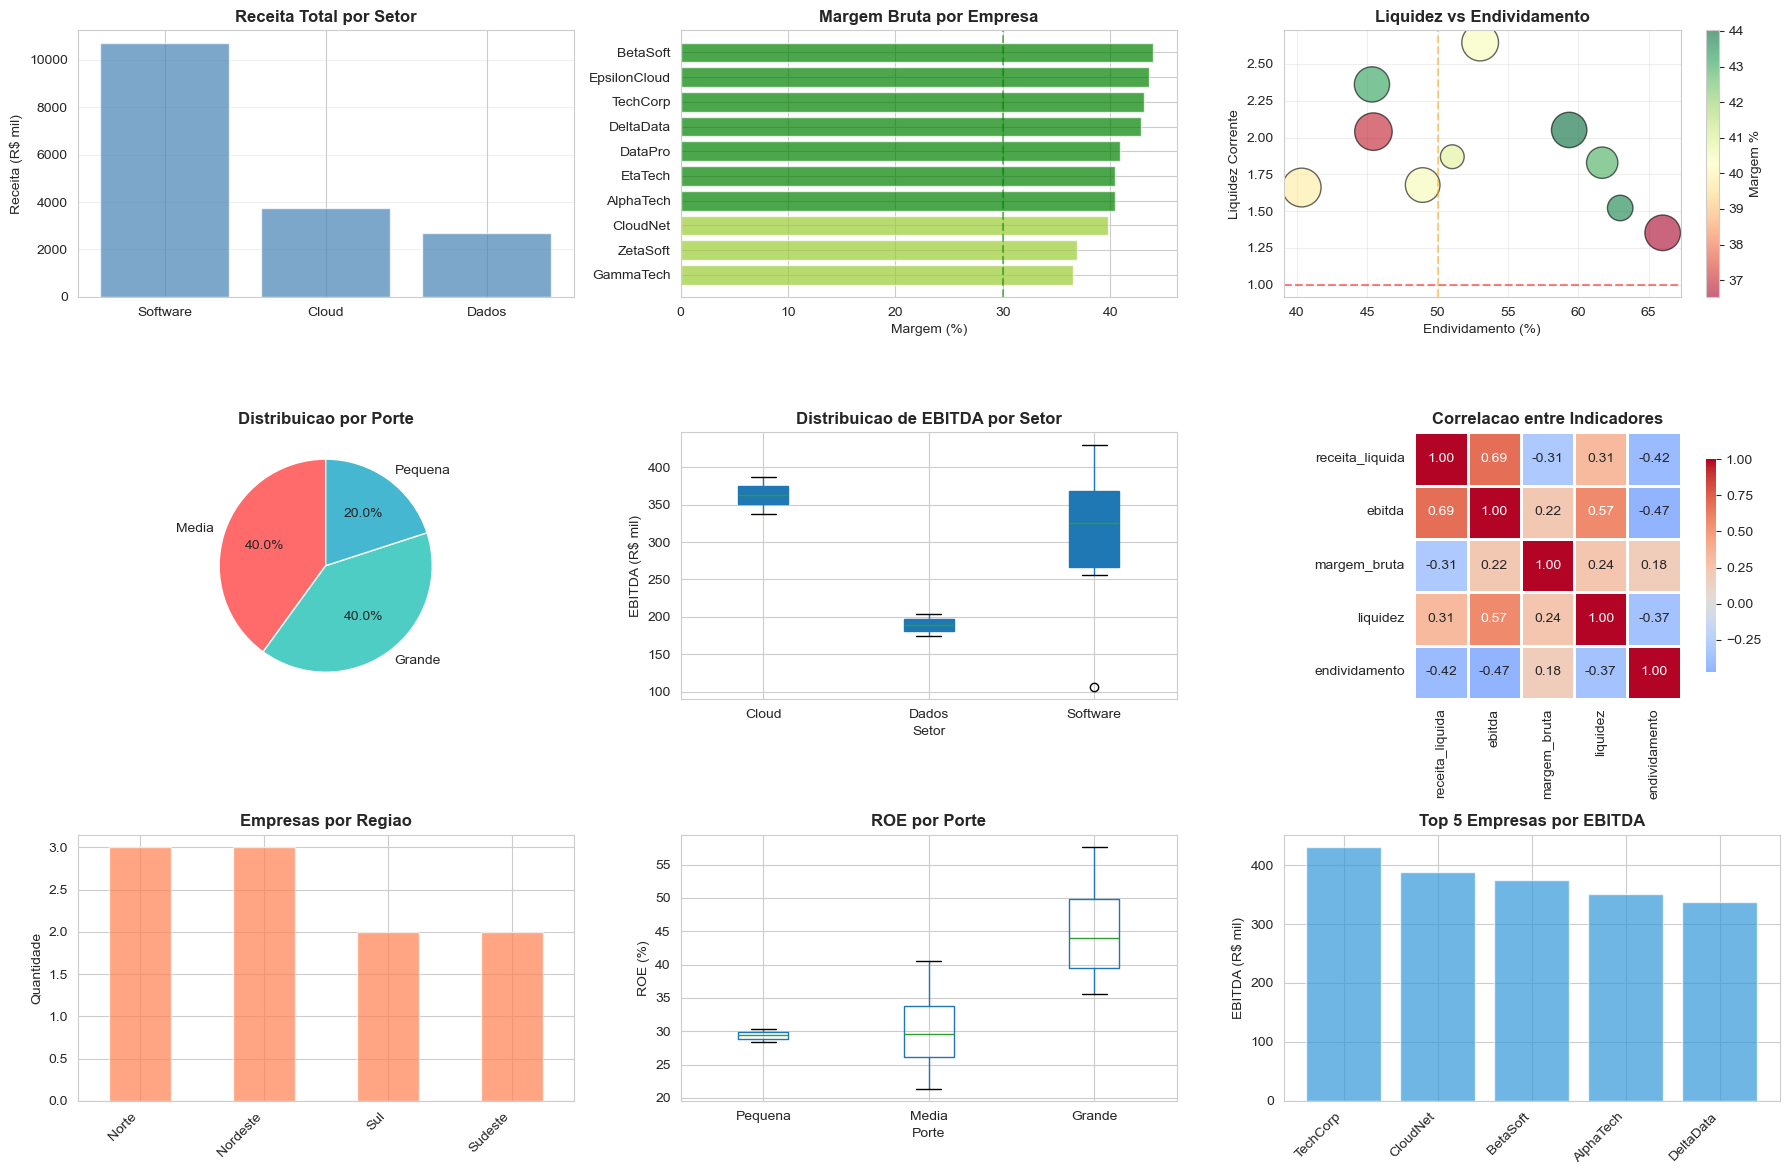


9 VISUALIZACOES CRIADAS COM SUCESSO!


In [13]:
# ==========================================
# VISUALIZAÇÕES PROFISSIONAIS
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

print("=" * 90)
print("GERANDO VISUALIZACOES")
print("=" * 90)

fig = plt.figure(figsize=(18, 12))
fig.suptitle('Analise Completa de Balancos - 10 Empresas Tech Brasil', 
             fontsize=18, fontweight='bold', y=0.995)

# ==========================================
# GRAFICO 1: Receita por Setor
# ==========================================
ax1 = plt.subplot(3, 3, 1)
resumo_setor_sorted = resumo_setor.sort_values('receita_total', ascending=False)
ax1.bar(resumo_setor_sorted['setor'], resumo_setor_sorted['receita_total'], 
        color='steelblue', alpha=0.7)
ax1.set_title('Receita Total por Setor', fontweight='bold')
ax1.set_ylabel('Receita (R$ mil)')
ax1.set_xlabel('')
ax1.grid(axis='y', alpha=0.3)

# ==========================================
# GRAFICO 2: Margem Bruta por Empresa
# ==========================================
ax2 = plt.subplot(3, 3, 2)
df_sorted = df_limpo.sort_values('margem_bruta', ascending=True)
cores_classe = df_sorted['classe_margem'].map({
    'Excelente': 'green', 
    'Boa': 'yellowgreen', 
    'Moderada': 'orange', 
    'Baixa': 'red'
})
ax2.barh(df_sorted['empresa'], df_sorted['margem_bruta'], color=cores_classe, alpha=0.7)
ax2.set_title('Margem Bruta por Empresa', fontweight='bold')
ax2.set_xlabel('Margem (%)')
ax2.axvline(x=30, color='green', linestyle='--', alpha=0.5)

# ==========================================
# GRAFICO 3: Liquidez vs Endividamento
# ==========================================
ax3 = plt.subplot(3, 3, 3)
scatter = ax3.scatter(df_limpo['endividamento'], df_limpo['liquidez'],
                      s=df_limpo['ativo_total']/3, 
                      c=df_limpo['margem_bruta'],
                      cmap='RdYlGn', alpha=0.6, edgecolors='black')
ax3.set_xlabel('Endividamento (%)')
ax3.set_ylabel('Liquidez Corrente')
ax3.set_title('Liquidez vs Endividamento', fontweight='bold')
ax3.axhline(y=1.0, color='red', linestyle='--', alpha=0.5)
ax3.axvline(x=50, color='orange', linestyle='--', alpha=0.5)
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Margem %')

# ==========================================
# GRAFICO 4: Distribuicao por Porte
# ==========================================
ax4 = plt.subplot(3, 3, 4)
df_limpo['porte'].value_counts().plot(kind='pie', ax=ax4, autopct='%1.1f%%', 
                                       startangle=90, colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax4.set_ylabel('')
ax4.set_title('Distribuicao por Porte', fontweight='bold')

# ==========================================
# GRAFICO 5: EBITDA por Setor (boxplot)
# ==========================================
ax5 = plt.subplot(3, 3, 5)
df_limpo.boxplot(column='ebitda', by='setor', ax=ax5, patch_artist=True)
ax5.set_title('Distribuicao de EBITDA por Setor', fontweight='bold')
ax5.set_ylabel('EBITDA (R$ mil)')
ax5.set_xlabel('Setor')
plt.suptitle('')

# ==========================================
# GRAFICO 6: Heatmap Correlacao
# ==========================================
ax6 = plt.subplot(3, 3, 6)
colunas_correlacao = ['receita_liquida', 'ebitda', 'margem_bruta', 'liquidez', 'endividamento']
corr = df_limpo[colunas_correlacao].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax6)
ax6.set_title('Correlacao entre Indicadores', fontweight='bold')

# ==========================================
# GRAFICO 7: Empresas por Regiao
# ==========================================
ax7 = plt.subplot(3, 3, 7)
df_limpo['regiao'].value_counts().plot(kind='bar', ax=ax7, color='coral', alpha=0.7)
ax7.set_title('Empresas por Regiao', fontweight='bold')
ax7.set_ylabel('Quantidade')
ax7.set_xlabel('')
plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45, ha='right')

# ==========================================
# GRAFICO 8: ROE por Porte
# ==========================================
ax8 = plt.subplot(3, 3, 8)
df_limpo.boxplot(column='roe', by='porte', ax=ax8)
ax8.set_title('ROE por Porte', fontweight='bold')
ax8.set_ylabel('ROE (%)')
ax8.set_xlabel('Porte')
plt.suptitle('')

# ==========================================
# GRAFICO 9: Top 5 Empresas (barras)
# ==========================================
ax9 = plt.subplot(3, 3, 9)
top5 = df_limpo.nlargest(5, 'ebitda')
ax9.bar(top5['empresa'], top5['ebitda'], color='#3498DB', alpha=0.7)
ax9.set_title('Top 5 Empresas por EBITDA', fontweight='bold')
ax9.set_ylabel('EBITDA (R$ mil)')
ax9.set_xlabel('')
plt.setp(ax9.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\n" + "="*90)
print("9 VISUALIZACOES CRIADAS COM SUCESSO!")
print("="*90)

In [14]:
# ==========================================
# RESUMO FINAL DO PROJETO
# ==========================================

print("=" * 90)
print("PROJETO FINAL - SEMANA 2 - RESUMO")
print("=" * 90)

print("\n📊 ESTATISTICAS DO PROJETO:")
print(f"  Dataset processado: {len(df_limpo)} empresas")
print(f"  Colunas originais: 13")
print(f"  Features criadas: {len(df_limpo.columns) - 13}")
print(f"  Colunas finais: {len(df_limpo.columns)}")

print("\n🧹 LIMPEZA:")
print(f"  Duplicatas removidas: {len(df) - len(df_limpo)}")
print(f"  Valores faltantes corrigidos: 3")
print(f"  Dataset final: 100% limpo")

print("\n🔧 TRANSFORMACOES:")
print(f"  Indicadores de balanco: 3")
print(f"  Indicadores de DRE: 3")
print(f"  Indicadores financeiros: 5")
print(f"  Classificacoes: 4")
print(f"  Total features: 16")

print("\n📈 ANALISES:")
print(f"  Setores analisados: {df_limpo['setor'].nunique()}")
print(f"  Regioes analisadas: {df_limpo['regiao'].nunique()}")
print(f"  Portes identificados: {df_limpo['porte'].nunique()}")

print("\n📊 VISUALIZACOES:")
print(f"  Graficos criados: 9")
print(f"  Tipos: barras, scatter, boxplot, heatmap, pizza")

print("\n🏆 DESTAQUES:")
melhor_margem = df_limpo.loc[df_limpo['margem_bruta'].idxmax()]
melhor_liquidez = df_limpo.loc[df_limpo['liquidez'].idxmax()]
maior_receita = df_limpo.loc[df_limpo['receita_liquida'].idxmax()]

print(f"  Melhor margem: {melhor_margem['empresa']} ({melhor_margem['margem_bruta']:.1f}%)")
print(f"  Melhor liquidez: {melhor_liquidez['empresa']} ({melhor_liquidez['liquidez']:.2f})")
print(f"  Maior receita: {maior_receita['empresa']} (R$ {maior_receita['receita_liquida']:,.0f}k)")

print("\n✅ PROJETO COMPLETO!")
print("="*90)

PROJETO FINAL - SEMANA 2 - RESUMO

📊 ESTATISTICAS DO PROJETO:
  Dataset processado: 10 empresas
  Colunas originais: 13
  Features criadas: 16
  Colunas finais: 29

🧹 LIMPEZA:
  Duplicatas removidas: 1
  Valores faltantes corrigidos: 3
  Dataset final: 100% limpo

🔧 TRANSFORMACOES:
  Indicadores de balanco: 3
  Indicadores de DRE: 3
  Indicadores financeiros: 5
  Classificacoes: 4
  Total features: 16

📈 ANALISES:
  Setores analisados: 3
  Regioes analisadas: 4
  Portes identificados: 3

📊 VISUALIZACOES:
  Graficos criados: 9
  Tipos: barras, scatter, boxplot, heatmap, pizza

🏆 DESTAQUES:
  Melhor margem: BetaSoft (44.0%)
  Melhor liquidez: AlphaTech (2.65)
  Maior receita: CloudNet (R$ 2,196k)

✅ PROJETO COMPLETO!
